Coursera >  
**Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning**  
Course link-https://www.coursera.org/learn/introduction-tensorflow  

**Week 1 : A new programming paradigm**  

*Traditional programming*   
Inputs - Data   
Output - Answers  
e.g.   
Data : x=[1,2,3]  
Rules : y=x-1  
Answers : y=[0,1,2]  

*Machine Learning*  
Inputs - Answers, Data  
Output - Rules  
e.g.  
Data : x=[1,2,3], y=[0,1,2]  
Rules : y=x-1   

[Neural Networks Playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.57311&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [0]:
# PREDICTING HOUSING PRICES BASED ON GIVEN NBER OF BEDROOMS

# Define model function
def house_model(y_new):
    # Define the labels
    # xs = No. of bedrooms in house
    # ys = Housing price n 100k
    xs = np.array([1,2,3,4,5],dtype=float)
    ys = np.array([1,1.5,2,2.5,3],dtype=float)

    # Define the model
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer='sgd',loss='mean_squared_error') # sgd= stochastic gradient descent
    model.fit(xs,ys,epochs=500)
    return model.predict(y_new)[0]

# Call model function and prediction of housing price for 7 bedrooms
prediction = house_model([7.0])
print(prediction)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 4.7826
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 2.7952
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 1.6370
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.9620
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5686
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3393
Epoch 7/500
1/1 [==============================] - 0s 768us/step - loss: 0.2056
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1277
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0822
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0556
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0401
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 13/500
1/1 [==============================] - 0s 2ms/

**Week2 : Introduction to Computer Vision**


(60000, 28, 28)
(10000, 28, 28)


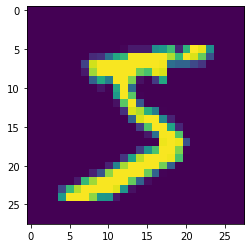

label 5


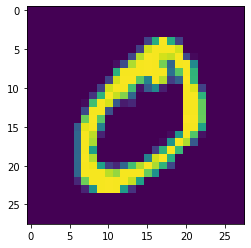

label 0


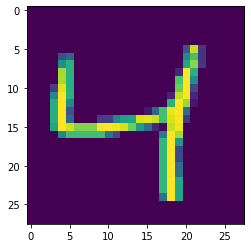

label 4


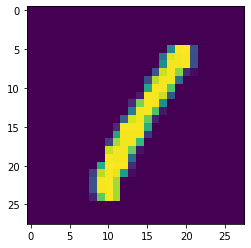

label 1


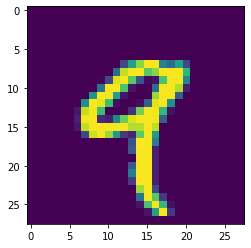

label 9


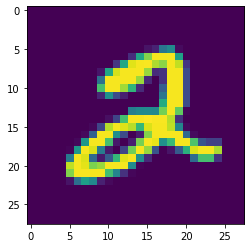

label 2


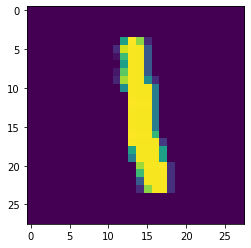

label 1


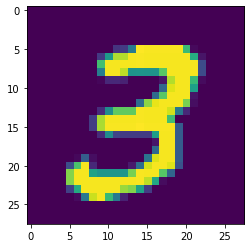

label 3


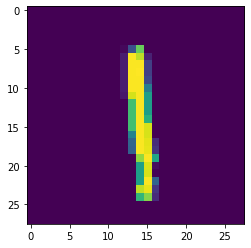

label 1


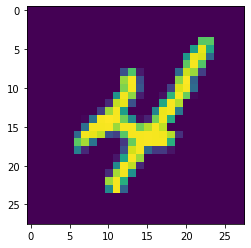

label 4
Epoch 1/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9402
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2031 - accuracy: 0.9404
...............


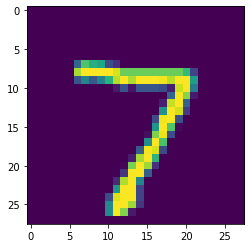

label 7


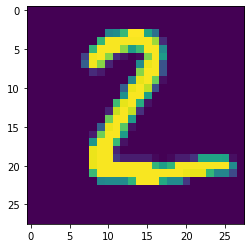

label 2


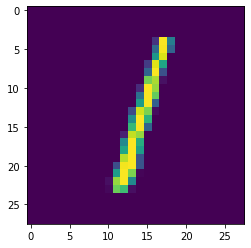

label 1


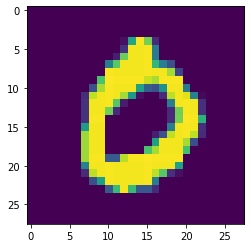

label 0


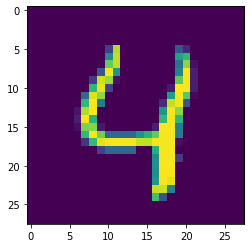

label 4


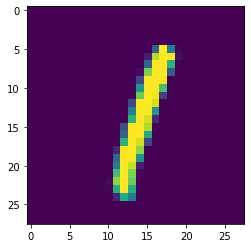

label 1


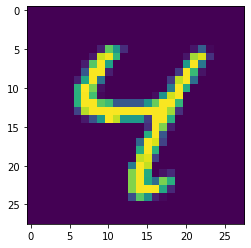

label 4


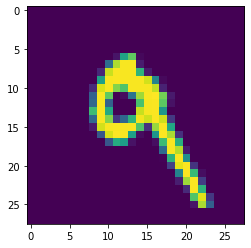

label 9


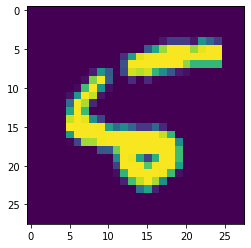

label 5


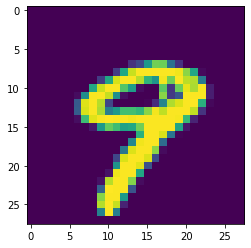

label 9


In [0]:
# HANDWRITING RECOGNITION

# Import source files
import tensorflow as tf
import matplotlib.pyplot as plt

# Define callback function that stips training when a certain accuracy level is reached
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.60):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

# Loading MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# 60,000 28*28 images - Training set
print(x_train.shape)
# 10,000 28*28 images - Test set
print(x_test.shape)
# Display the first 10 images
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()
  print("label",y_train[i])

# Normalization (Divide by 255 because it is easier to treat values between 0 and 1 )
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

# Define the model
model = tf.keras.models.Sequential([
  # Flatten transforms input image matrices to a single array of values
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Hidden layer with 512 neurons and ReLu activation function (only takes positive values)
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  # Output layer with size of 10 neurons because of 10 categories of fasion items
  # Softmax takes the bigget value from a set of values
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Fit/ train the model
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
print("...............")
# Displazing 10 test examples
for i in range(10):
  plt.imshow(x_test[i])
  plt.show()
  print("label",y_test[i])

2.2.0-rc2


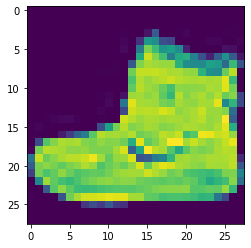

label 9


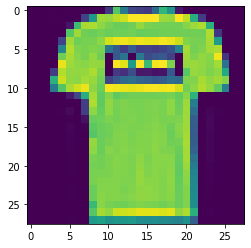

label 0


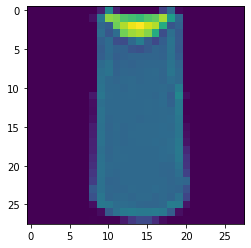

label 0


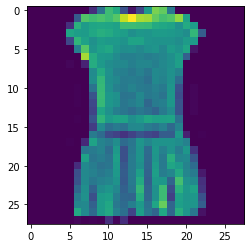

label 3


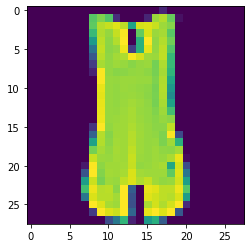

label 0


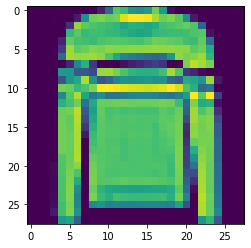

label 2


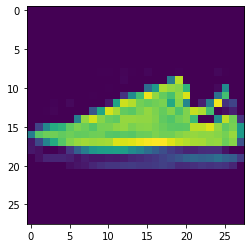

label 7


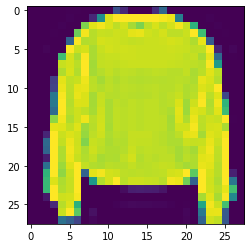

label 2


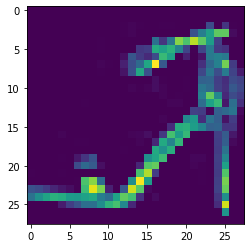

label 5


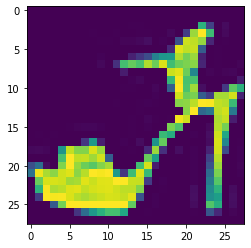

label 5
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4786
Epoch 2/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.3614
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3611


In [0]:
# FASHION ITEMS RECOGNITION USING FASHION MNIST DATASET
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
for i in range(10):
  plt.imshow(training_images[i])
  plt.show()
  print('label',training_labels[i])
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

**Week3 : Enhancing Vision with Convolutional Neural Networks**

In [0]:
# FASHION ITEMS RECOGNITION USING CNNs
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.2.0-rc2
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_37 (Dense)             (None, 10)    

**Week 4 : Using Real-World Images**

In [0]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

def train_happy_sad_model():

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>DESIRED_ACCURACY):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator


    # Please use a target_size of 150 X 150.
    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(
        "/tmp/h-or-s",  
        target_size=(150, 150), 
        batch_size=10,
        class_mode='binary')        
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting

    history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,  
      epochs=15,
      verbose=1,
      callbacks=[callbacks])          
    # model fitting
    return history.history['acc'][-1]

train_happy_sad_model()